# ※Java 및 Spark(PySpark) 설치 단계

## Step 0: 구글 드라이브와 Colab 마운트

마운트(Mount): USB 꽂은 것처럼 연결한다는 의미. 즉, 구글 드라이브와 Colab을 연결한다는 의미임.
->원래는 마운트하고, MyDrive에 Spark,Java 설치해서 세션 종료되어도 매번 설치 없이 빠르게 접근하려고 했으나, 일단은 이 방법 보류함.(일단은, 매번 실행하는 걸로 진행함.)

※cf.) Google Colab vs Jupyter Notebook 세션 종료시 차이점 -> 둘 다 .ipynb 형식이다.

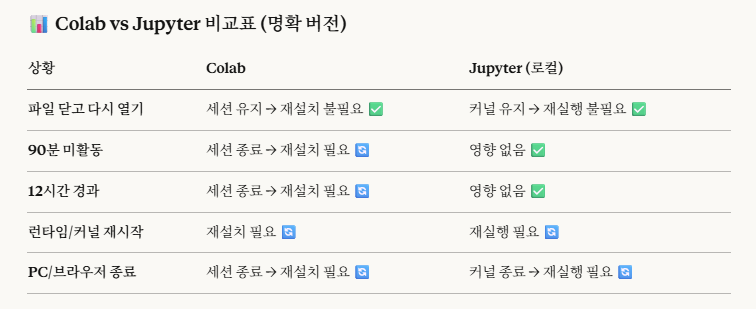

->이 부분 일부 틀렸을 수도 있다.
(90분,120분 미활동 시 -> 세션 종료 이 부분. -> 밑에 추가 설명 참고)

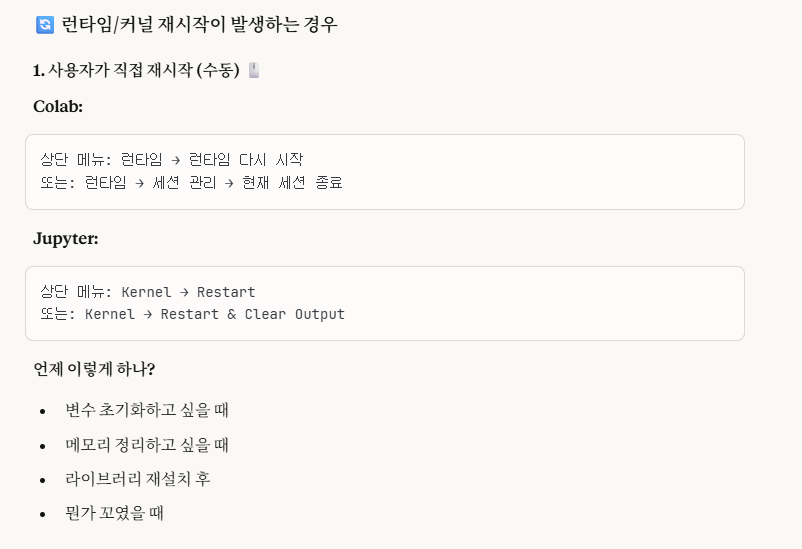

->※런타임(Runtime Environment): 실행 환경. 코드가 돌아가는 환경

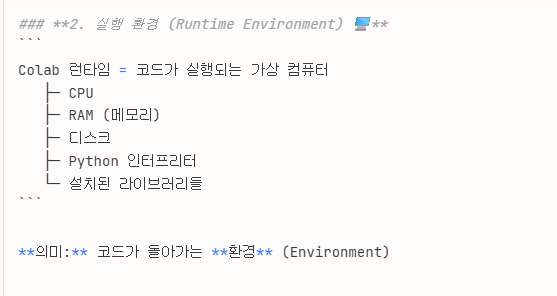

※추가로 이런 경우에는 그대로 유지된다.(기존 런타임 재연결 -> 기존 세션 유지)

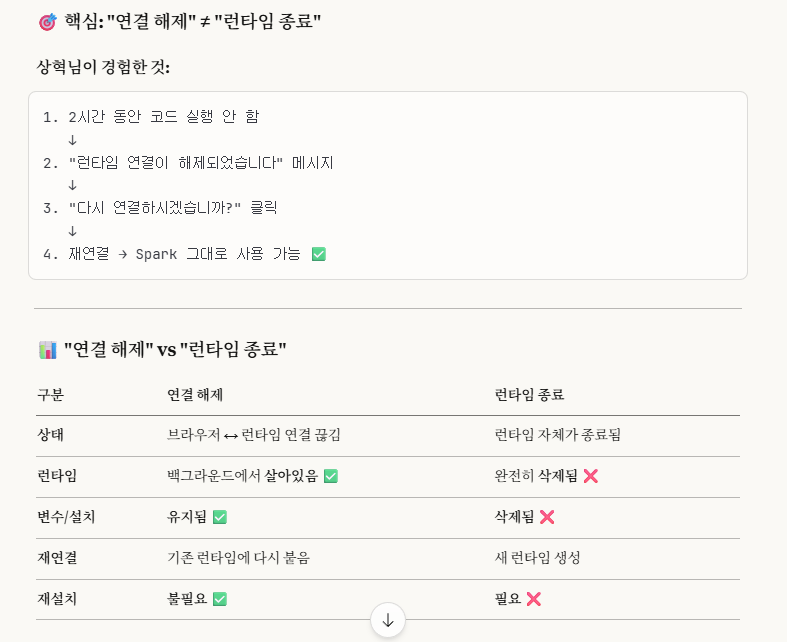

In [1]:
!ls /content/drive # 에러: 그런 폴더 없음(못 찾음)

ls: cannot access '/content/drive': No such file or directory


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive # 이제 폴더 찾을 수 있음.

MyDrive


## step 1: Java 설치(Spark는 Java 기반)

Spark는 Java/Scala로 만들어져서 Java 실행 환경(JVM, Java Virtual Machine) 필수

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null # apt-get: 리눅스(Ubuntu) 패키지 관리자(프로그램 설치 도구). # openjdk-8-jdk-headless: openjdk(오픈소스 Java) + 8(Java 8 버전) + jdk(Java Development Kit,개발 도구 포함) + headless(GUI 없는 버전, 서버용(가벼움)). # -qq: 조용히 설치(진행 메시지 최소화). # /dev/null: 출력 메시지를 버림(화면에 안 보임)

## Step 2: Spark 다운로드 및 설치(압축 해제)

In [2]:
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz # wget: 인터넷에서 파일 다운로드하는 리눅스 명령어. # -q: 조용히 다운로드(quiet mode, 진행상황 안 보임) # https://archive.apache.org/...: Apache Spark 공식 다운로드 주소  # spark-3.5.0-bin-hadoop3.tgz: (spark-3.5.0: Spark 버전 3.5.0) + (bin: 이미 컴파일된 실행 파일(binary). 우리의 고수준 프로그래밍 언어(C++,Java,Python 등) -> 저수준 언어(기계어(0,1 -> binary)로 변환함을 의미함.) assembly 언어는 기계어보다 한 단계 높은 수준의 저수준 프로그래밍 언어이다. -> 그래서 기계어와 가장 가까이 있으므로 변환 과정에서 가장 오류가 덜 나고 잘 통함.) + (hadoop3: hadoop 3 버전과 호환) + (.tgz: 압축 파일 형식(tar+gzip). 대용량 파일 압축에 쓰임)
!tar xf spark-3.5.0-bin-hadoop3.tgz # tar: 압축 해제 도구. # xf: x(extract:압축 풀기) + f(file:다음에 오는 파일명 지정). # spark-3.5.0-bin-hadoop3.tgz: 위에서 다운받은 압축 파일.

## Step 3: 환경 변수 설정(Spark가 Java와 자기 위치 찾게)

In [3]:
import os # 운영체제 관련 기능 사용(환경 변수 설정)
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" # JAVA_HOME: Java가 설치된 경로를 알려주는 환경 변수.
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3" # SPARK_HOME: Spark가 설치된 경로를 알려주는 환경 변수

## Step 4: PySpark 설치 (Python에서 Spark 사용)

In [4]:
!pip install -q findspark # '!'의 의미는, '리눅스 터미널 명령어를 실행해라'라는 의미이다. # findspark: Python에서 Spark를 찾아주는 헬퍼 라이브러리
!pip install -q pyspark # pyspark: Python용 Spark 인터페이스 (API)

## Step 5: Spark 초기화 (Python과 Spark 연결)

In [5]:
import findspark
findspark.init() # 초기화

print("✅ Spark 설치 완료!")

✅ Spark 설치 완료!




---



# ※Spark 실행 확인 + 간단한 첫 실습 진행

## Step 1: Spark 실행 확인

In [7]:
from pyspark.sql import SparkSession # Spark 세션 생성. # SparkSession: Spark의 진입점(모든 작업의 시작점)

# Spark 세션 생성
# - builder: 설정을 단계별로 구성
# - appName: 앱 이름 지정
# - getOrCreate: 있으면 재사용, 없으면 생성

spark = SparkSession.builder \
    .appName("Phase5_Spark_Basics") \
    .getOrCreate()

# Spark 버전 확인
print(f"🎉 Spark version: {spark.version}")
print("✅ Spark 실행 성공!")

# Spark UI 링크 (클러스터 상태 모니터링)
# UI 링크는 Colab 컨테이너 hostname(컴퓨터 이름)을 host로 가지는데, Google 내부 네트워크 주소이므로 외부에서 접속은 불가능하다.
print(f"📊 Spark UI: {spark.sparkContext.uiWebUrl}")

🎉 Spark version: 4.0.1
✅ Spark 실행 성공!
📊 Spark UI: http://1d058edf58fb:4040


## Step 2: 첫 번째 Spark Dataframe 만들기

In [8]:
# Python 리스트로 Dataframe 생성

# 1. 데이터 준비
data = [
    ("Alice", 25, "서울"),
    ("Bob", 30, "부산"),
    ("Charlie", 35, "대구"),
    ("David", 28, "인천"),
    ("Eve", 32, "광주")
]

# 2. 칼럼 이름 정의
columns = ["name", "age", "city"]

# 3. Spark Dataframe 생성
df = spark.createDataFrame(data,columns) # # spark.createDataFrame(): 리스트를 Spark DataFrame으로 변환. # data: 데이터 (리스트 of 튜플). # columns: 컬럼 이름 리스트

# 4. DataFrame 내용 출력
df.show() # show(): 데이터 출력 (기본 20행). # 주의: 이때 실제로 실행됨 (Lazy Evaluation 종료)



+-------+---+----+
|   name|age|city|
+-------+---+----+
|  Alice| 25|서울|
|    Bob| 30|부산|
|Charlie| 35|대구|
|  David| 28|인천|
|    Eve| 32|광주|
+-------+---+----+



## Step 3: Pandas와 비교해보기

In [9]:
# Pandas Dataframe과 비교

import pandas as pd

# 같은 데이터로 Pandas Dataframe 생성
df_pandas = pd.DataFrame(data,columns=columns)

print("📊 Pandas DataFrame:")
print(df_pandas)
print("\n" + "="*50 + "\n")

print("⚡ Spark DataFrame:")
df.show()

📊 Pandas DataFrame:
      name  age city
0    Alice   25   서울
1      Bob   30   부산
2  Charlie   35   대구
3    David   28   인천
4      Eve   32   광주


⚡ Spark DataFrame:
+-------+---+----+
|   name|age|city|
+-------+---+----+
|  Alice| 25|서울|
|    Bob| 30|부산|
|Charlie| 35|대구|
|  David| 28|인천|
|    Eve| 32|광주|
+-------+---+----+



## Step 4: 간단한 연산해보기

In [10]:
# Spark Dataframe 기본 연산

# 1. 스키마(구조) 확인
print("📋 DataFrame 스키마:")
df.printSchema() # # printSchema(): DataFrame의 컬럼 타입 출력

print("\n" + "="*50 + "\n")

# 2. 데이터 갯수 확인
print(f"📊 총 데이터 개수: {df.count()}개")

print("\n" + "="*50 + "\n")

# 3. 특정 칼럼만 선택
print("📌 이름과 나이만 선택:")
df.select("name", "age").show() # select(): 원하는 컬럼만 선택 (SQL의 SELECT와 동일)

print("\n" + "="*50 + "\n")

# 4. 조건 필터링
print("📌 나이가 30 이상인 사람:")
df.filter(df["age"] >= 30).show() # filter(): 조건에 맞는 행만 선택 (SQL의 WHERE와 동일)

print("\n" + "="*50 + "\n")

# 5. 정렬
print("📌 나이 순으로 정렬 (내림차순):")
df.orderBy("age", ascending=False).show()
# orderBy(): 특정 컬럼 기준으로 정렬 (SQL의 ORDER BY와 동일)
# ascending=False: 내림차순 정렬



📋 DataFrame 스키마:
root
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)
 |-- city: string (nullable = true)



📊 총 데이터 개수: 5개


📌 이름과 나이만 선택:
+-------+---+
|   name|age|
+-------+---+
|  Alice| 25|
|    Bob| 30|
|Charlie| 35|
|  David| 28|
|    Eve| 32|
+-------+---+



📌 나이가 30 이상인 사람:
+-------+---+----+
|   name|age|city|
+-------+---+----+
|    Bob| 30|부산|
|Charlie| 35|대구|
|    Eve| 32|광주|
+-------+---+----+



📌 나이 순으로 정렬 (내림차순):
+-------+---+----+
|   name|age|city|
+-------+---+----+
|Charlie| 35|대구|
|    Eve| 32|광주|
|    Bob| 30|부산|
|  David| 28|인천|
|  Alice| 25|서울|
+-------+---+----+

